# Galaxy evolution in dense environments

### Part 1:  
The evolution of galaxies is influenced by the environment in which they live. This exercise aims to study the transformations of galaxies in dense environments using two highly complementary approaches:  

1. Study the differences in galaxy colors for objects living in different environments with a large statistical sample.  
2. Focus on a single galaxy to reconstruct its star formation history, witnessing the effects of environmental quenching.

We will use data from the **SDSS survey (Data Release 16)**, a nearly all-sky spectroscopic and photometric survey that provides galaxy properties for thousands of objects up to redshift \( z \approx 0.15 \).  

The data is provided in the file **SDSS_Session4.fits**, a FITS table. In extension 1, this table includes:  
- Galaxy positions on the sky (RA, Dec)  
- Redshifts (\( z < 0.03 \))  
- Local galaxy density in 3D cylinders (base radius: 0.5 Mpc, depth in redshift space: 2000 km/s)  
- The logarithm of stellar mass (\( \log_{10} M_* \) in solar mass units)  
- Observed photometry in the \( u, g, r, i, z \) filter set

#### **1 – Distribution of Galaxies in the Sky and Defining Overdensity & Color Metric:**  
- **Plot the distribution of galaxies on the sky:** Analyze whether galaxies are uniformly distributed.  
- **Galaxy Overdensity Definition:** Compute the overdensity metric using  
  $$ \delta = \frac{\Sigma_i}{\langle \Sigma \rangle} $$  
  Express overdensity in logarithmic form as  
  $$ \log_{10}(1 + \delta) $$.  
- **Galaxy Color Definition:** Compute the “color” of a galaxy using the difference in magnitudes between two bands or the ratio of fluxes in two bands.

#### **2 – Color-Mass Diagram Across Overdensity Bins:**  
- Divide the sample into 3–4 bins based on overdensity, from isolated galaxies to dense environments.  
- Plot color-mass diagrams for each bin and examine galaxy distribution.  
- Identify any regions in the parameter space highly populated in certain environments but sparse in others.  
- Define a relation to separate galaxy populations sensibly.

#### **3 – Population Fraction & Segregation Analysis:**  
- Quantify the fraction of galaxies in two or three populations as a function of environment.  
- Further quantify segregation in different regions of the color-mass diagram.  
- Explain findings in the context of relevant astrophysical theories.


In [110]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

with fits.open("SDSS_EnvCatalogue.fits") as hdul:
    #hdul.info()
    data = hdul[1].data
    header = hdul[1].header

In [111]:
#print(data)
#print(data.columns)
#print(header)

In [112]:
import pandas as pd

# Convert the FITS data to a pandas DataFrame
df = pd.DataFrame.from_records(data)

# Extract the necessary columns efficiently
objid = df['OBJID'].to_list()
ra = df['Ra'].to_list()
dec = df['Dec'].to_list()
ssfr = df['ssfr'].to_list()
mass = df['mass'].to_list()
dens_05 = df['dens_05'].to_list()
redshift = df['redshift'].to_list()
mag_r = df['Mag_r'].to_list()
up = df['up'].to_list()
up_err = df['up_err'].to_list()
gp = df['gp'].to_list()
gp_err = df['gp_err'].to_list()
rp = df['rp'].to_list()
rp_err = df['rp_err'].to_list()
ip = df['ip'].to_list()
ip_err = df['ip_err'].to_list()
zp = df['zp'].to_list()
zp_err = df['zp_err'].to_list()

#print(df)

In [113]:
#print(min(redshift))
#print(dens_05)

**Environmental density**

There are several ways to define the local environment of galaxies, the two most used are:
- Count galaxies in a cylinder with a base radius $r_{ap}$ (in Kpc) and a depth of (in km/s). The densest environments will have the highest scores in this metric. Most largely used in the literature.
- Find the distance of the Nth nearest neighbour to each galaxy. The densest environments will have the lowest score in this metric.

$$\Sigma_{gal} = \frac{\sum_{gal}w_{gal}}{\pi r_{ap}^2}$$

Each galaxy has a weight $w=1$, and that the sum extends over galaxies within a in redshift space. 

<div style="text-align: center;">
    <img src="images/density1.png" width="200" style="margin-right: 50px;" />
    <img src="images/density2.png" width="350" />
</div>

- Another definition is dens_05:

$$\text{dens\_05} = \frac{\text{Number of galaxies within 0.5 Mpc radius}}{\frac{4}{3}\pi (0.5)^3}$$

If assuming uniform density and a thin cylinder, a rough relationship can be approximated:

$$\Sigma_{gal} = \text{dens\_05} \times 2 \times \text{cylinder depth}$$ 

Where "cylinder depth" is the redshift space depth converted to physical Mpc. Surface densities are extracted in cylinders of 2000 Mpc lenght. 
If we want to compute the mean density, which is extracted from a 4000 Mpc deep square, we need to moltiply by 2.
In real datasets, this relationship is more complex because galaxies are not uniformly distributed, and projection effects need to be carefully handled.

- Overdensity:

$$\delta = \frac{\Sigma_i - \langle\Sigma\rangle}{\langle\Sigma\rangle}$$



0.0150032 0.0299997


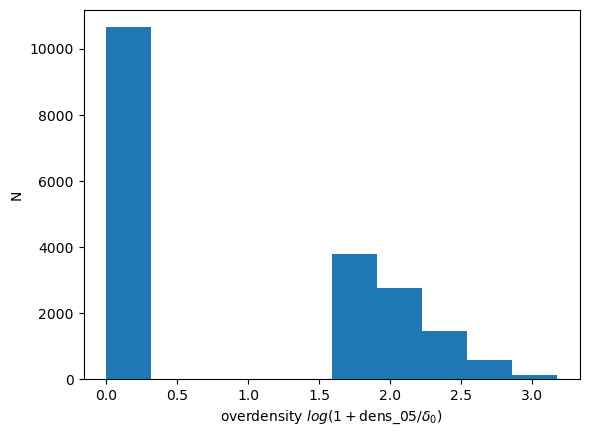

In [13]:
# Comoving distance given z: Ned Wright's Cosmology Calculator (UCLA)
# https://www.astro.ucla.edu/~wright/CosmoCalc.html

z_min = min(redshift)
z_max = max(redshift)
#print(z_min,z_max)

comoving_V_zmax = 0.009 * 1e9 # Mpc^3
comoving_V_zmin = 0.001 * 1e9 # Mpc^3


V_sdss_region = ((max(ra)-min(ra))*(max(dec)-min(dec))/41252.96)*(comoving_v_zmax-comoving_v_zmin)
N = len(objid)
mean_density = 2*(N/V_sdss_region)

overdensity = np.log10(1 + np.array(dens_05)/mean_density)

plt.hist(overdensity)
plt.xlabel("overdensity $log(1+\\text{dens_05}/\delta_0)$")
plt.ylabel("N")
plt.show()


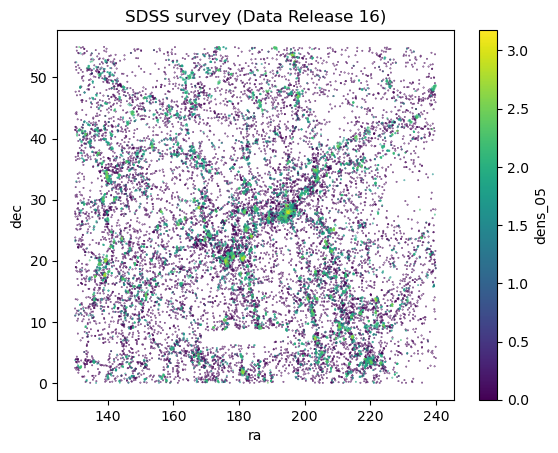

In [16]:
plt.title("SDSS survey (Data Release 16)")
sc = plt.scatter(ra,dec, c = overdensity, s = 0.1, cmap = 'viridis')

cb = plt.colorbar(sc)
cb.set_label('dens_05')
plt.xlabel('ra')
plt.ylabel('dec')

plt.show()


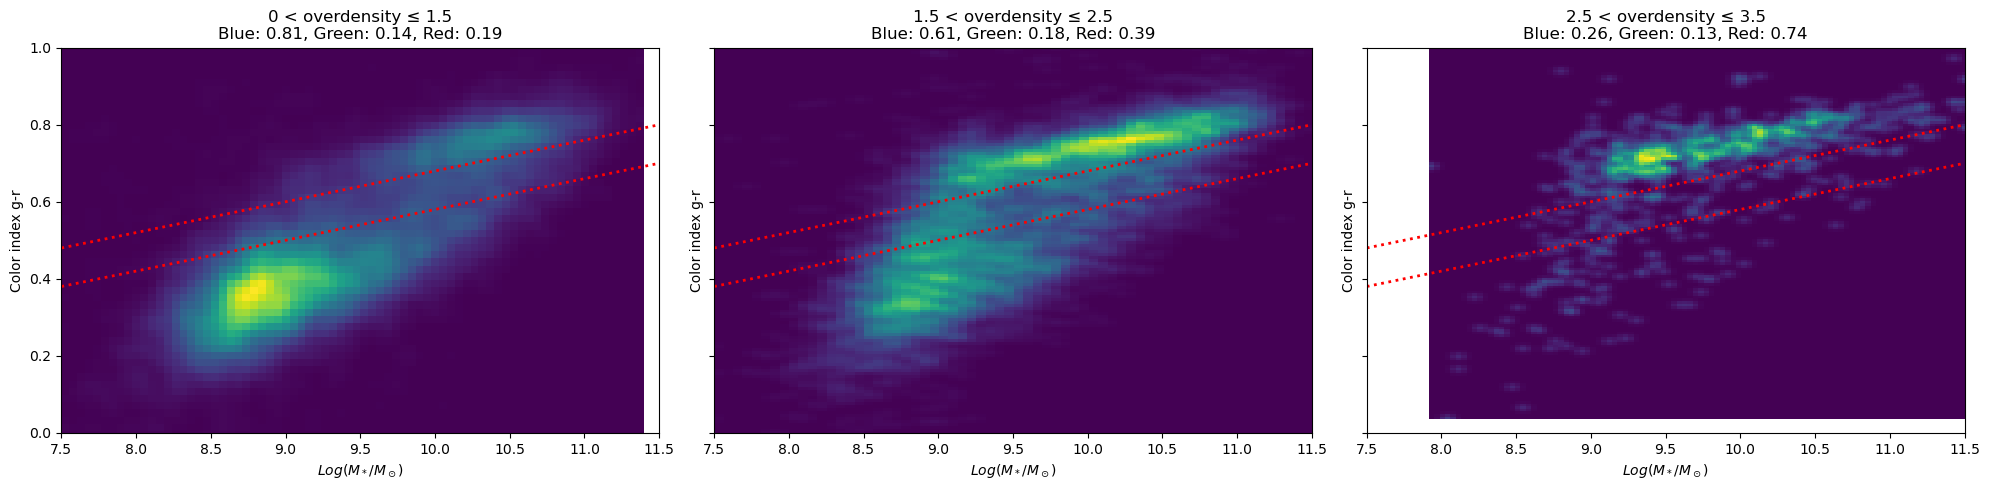

In [32]:
# g-r versus mass in three different overdensity bins

color_index_gr = np.array(gp) - np.array(rp)
mass = np.array(mass)

overdensity_bins = [0, 1.5, 2.5, 3.5]

fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

bins = [100, 500]  
m_bin = np.linspace(7.5,11.5)
line_sup = 0.08*(m_bin-10) + 0.68
line_inf = 0.08*(m_bin-10) + 0.58

blue_counts = []
green_counts = []
red_counts = []

from scipy.ndimage import gaussian_filter

for i in range(3):  
 
    mask = (overdensity >= overdensity_bins[i]) & (overdensity < overdensity_bins[i + 1])

    hist, mass_bin, color_bin = np.histogram2d(mass[mask], color_index_gr[mask], bins=bins)
    smoothed_hist = gaussian_filter(hist, sigma=1)
    
    ax[i].pcolormesh(mass_bin, color_bin, smoothed_hist.T, cmap='viridis', shading='auto')
    ax[i].plot(m_bin, line_sup, c='r', linestyle=':', linewidth=2,alpha=1)
    ax[i].plot(m_bin, line_inf, c='r', linestyle=':', linewidth=2,alpha=1)

    ax[i].set_xlim(7.5,11.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel('$Log(M_*/M_\odot)$')
    ax[i].set_ylabel('Color index g-r')

    # count galaxies in red and blue sequences and in the green valley
    m = mass[mask]
    c_indx = color_index_gr[mask]
    mask_b = c_indx < 0.08*(m-10) + 0.68
    mask_g = (c_indx >= 0.08*(m-10) + 0.58) & (c_indx < 0.08*(m-10) + 0.68)
    mask_r = c_indx > 0.08*(m-10) + 0.68
    f_b = len(m[mask_b])/len(m)
    f_g = len(m[mask_g])/len(m)
    f_r = len(m[mask_r])/len(m)

    ax[i].set_title(f'{overdensity_bins[i]} < overdensity ≤ {overdensity_bins[i+1]}\n'
                    f'Blue: {f_b:.2f}, Green: {f_g:.2f}, Red: {f_r:.2f}')
    
    blue_counts.append(f_b)
    green_counts.append(f_g)
    red_counts.append(f_r)


plt.tight_layout()
plt.show()

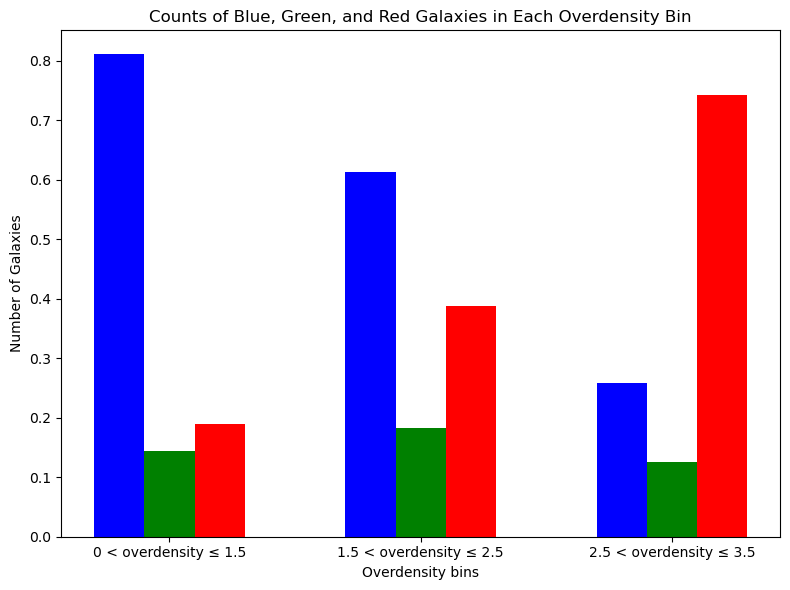

In [31]:
# Create a separate figure for the bar plot of counts
fig_bar, ax_bar = plt.subplots(figsize=(8, 6))

# Define bar positions
x = np.arange(3)  # Positions for the bars
width = 0.2  # Width of the bars

# Plot bars for blue, green, and red galaxies in each density bin
ax_bar.bar(x - width, blue_counts, width, label='Blue', color='blue')
ax_bar.bar(x, green_counts, width, label='Green', color='green')
ax_bar.bar(x + width, red_counts, width, label='Red', color='red')

# Set the labels and title
ax_bar.set_xlabel('Overdensity bins')
ax_bar.set_ylabel('Number of Galaxies')
ax_bar.set_title('Counts of Blue, Green, and Red Galaxies in Each Overdensity Bin')
ax_bar.set_xticks(x)
ax_bar.set_xticklabels([f'{overdensity_bins[i]} < overdensity ≤ {overdensity_bins[i+1]}' for i in range(3)])

# Add a legend
#ax_bar.legend()

# Show the plots
plt.tight_layout()
plt.show()


Comment: 

## Part 2

Spectroscopy of a galaxy can offer insights about the age of its stellar populations. Stronger constraints are provided by the combination of spectroscopy and multiwavelength photometry, which helps break the degeneracies between age, dust, and metallicity in different regions of the galaxy.

### Focus: NGC 4330 in the Virgo Cluster

We will focus on **NGC 4330**, an intermediate-mass galaxy falling into the **Virgo Cluster**. The following figure shows:

- **Left panel**: Ionized gas map of NGC 4330.
- **Right panel**: r-band map of the galaxy.

<div style="text-align: center;">
    <img src="images/NGC4330.png" width="500" style="margin-right: 50px;" />
</div>


The data has been collected using the **ESO/VLT FORS2 instrument** along the narrow slit shown in red in the figure.

Photometric data from the **UV to the NIR** have been extracted in **13 regions** along the slit, and spectra have been extracted from the same regions. We will focus on regions **(1-3, 11-13)**, 

Spectra: Spec_N4330_regionX.fits (where X corresponds to the region number). 

Photometry: Phot_N4330.fits file (extension 1), and contains flux values in far UV (FUV), near UV (NUV), U, G, I, Z optical bands, IRAC bands (Spitzer Space Telescope) and PACS 100 micron band (Hershel Space Telescope).

Stellar Population Models: Models_N4330_regionX.fits files. Each region has a set of models with two free parameters:

    TRUNCAGE: The lookback time at which the quenching event began.
    TRUNCTAU: The exponential timescale of the quenching.

Each model contains synthetic photometry and spectra, which will be used to fit the observed data.

Tasks:

1. Plot different spectral models on top of the observed spectrum (suggestion: use region 2 to
start with). If necessary, scale the models with a multiplicative factor to match the spectrum
units.

2. Define a goodness-of-fit metric that can be minimized in order to identify the best model
that reproduces the photometry and the spectrum for each region. Compare your results
with the values given in Fossati et al. 2018 (http://arxiv.org/abs/1801.09685). Which
phenomenon can be responsible for the quenching times you found?

3. Does the best fit model change if we fit only the spectrum? and if we use only the
photometry? What features in the spectrum, and which photometric bands provide the strongest
constraints to time the quenching event?


In [107]:
# import observed spectra

spec_files = glob.glob(f"Spec_*.fits")

spec_data = {}

for file in spec_files:
    spec = fits.open(file)
    specflx = spec[0].data
    specerr = spec[1].data
    specwav = spec[2].data

    region_number = os.path.basename(file).split("_")[2].replace(".fits", "")

    spec_data[f'{region_number}'] = {
        "filename": file,
        "flux": specflx,
        "error": specerr,
        "wavelength": specwav
    }


# import observed photometry

with fits.open("Phot_N4330.fits") as hdul:
    #print(hdul.info())
    #print(hdul[1].header)  # Print header information
    data = hdul[1].data
#print(data.columns)

phot_fluxes = {}
phot_errors = {}

for i, reg in enumerate(data['id']):
    phot_fluxes[f"region{reg}"] = [
        data['f_FUV'][i], data['f_NUV'][i], data['f_U'][i],
        data['f_G'][i], data['f_I'][i], data['f_Z'][i],
        data['f_IRAC1'][i], data['f_IRAC4'][i], data['f_PACS100'][i]
    ]
    phot_err[f"region{reg}"] = [
        data['e_FUV'][i], data['e_NUV'][i], data['e_U'][i],
        data['e_G'][i], data['e_I'][i], data['e_Z'][i],
        data['e_IRAC1'][i], data['e_IRAC4'][i], data['e_PACS100'][i]
    ]

# Import models 

mod_files = glob.glob(f"Models_*.fits") 

models_per_region = {}

for file in mod_files: 

    modhdu = fits.open(file)
    Next = modhdu[0].header['NEXT'] 
    modwave = modhdu[0].data[0]

    region_number = os.path.basename(file).split("_")[2].replace(".fits", "")

    models = []
    for ext in np.arange(1,Next+1):

        thishead = modhdu[ext].header
        modspec = modhdu[ext].data[0]
        
        Qtau = thishead['TRUNCTAU']
        Qage = thishead['TRUNCAGE']
        
        photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
        thishead['MODU'],thishead['MODG'],\
        thishead['MODI'],thishead['MODZ'], \
        thishead['MODIR1'],thishead['MODIR4']))
        
        models.append({"spec":modspec,"Qtau":Qtau,"Qage":Qage,"photarr":photarr})
 
    models_per_region[f'{region_number}'] = {
        "wavelength": modwave,
        "models": models
    }





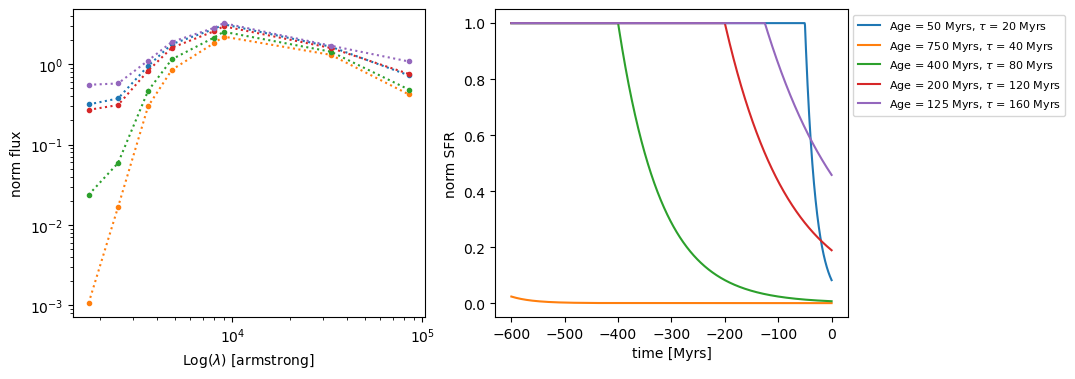

In [152]:
# Photometry

fig, ax = plt.subplots(1,2,figsize=(10,4))

wavelengths_filters = [1750,2500,3600,4800,8000,9000,33000,85000]
for i in range(5):
    
    mod = models_per_region['region2']['models'][i*20]
    Qage, Qtau = mod['Qage'], mod['Qtau']
    
    ax[0].plot(wavelengths_filters,mod['photarr'],linestyle=':',marker='.')
    
    t = np.linspace(0,-600,1000)
    sfr_norm = np.where(t<-Qage, 1, np.exp(-(t+Qage)/Qtau))
    
    ax[1].plot(t,sfr_norm,label=f"Age = {Qage} Myrs, $\\tau$ = {Qtau} Myrs")

ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

ax[0].set_xlabel("Log$(\lambda)$ [armstrong]")
ax[0].set_ylabel("norm flux")

ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].set_xlabel("time [Myrs]")
ax[1].set_ylabel("norm SFR")

#ax[1].set_yscale("log")

plt.show()

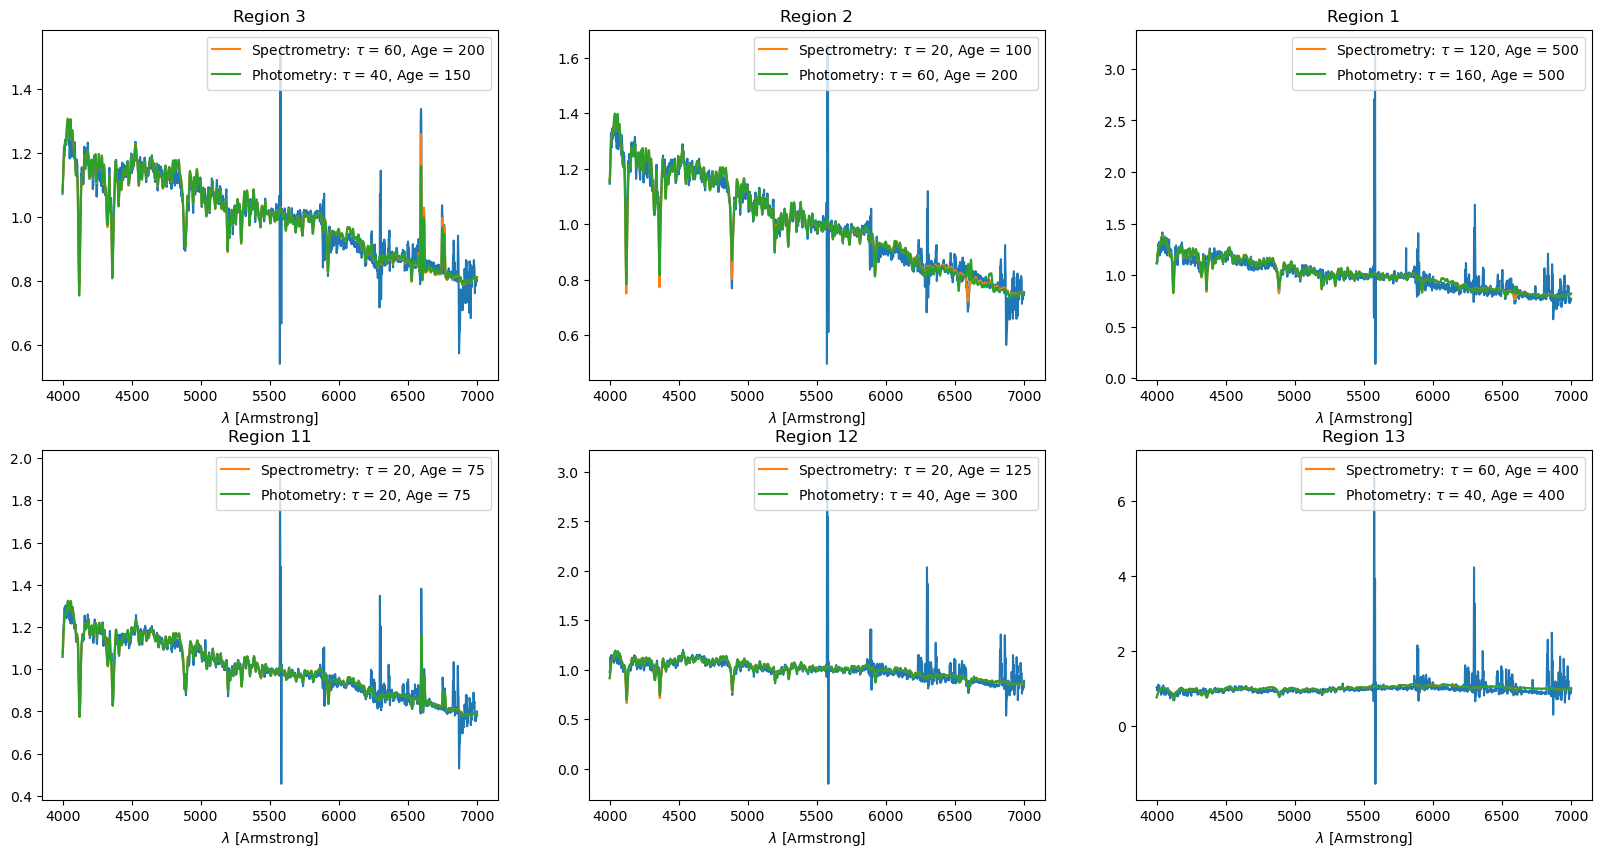

In [154]:
# Spectroscopy

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()

regions = ['3','2','1','11','12','13']

spec_Qtau = []
spec_Qage = []

phot_Qtau = []
phot_Qage = []

for i, reg in enumerate(regions):
    
    spec_obs = spec_data[f'region{reg}']['flux'] / np.mean(spec_data[f'region{reg}']['flux']) 
    spec_err = spec_data[f'region{reg}']['error'] / np.mean(spec_data[f'region{reg}']['flux']) 

    phot_obs = np.array(phot_fluxes[f"region{reg}"][:-1]) / np.mean(phot_fluxes[f"region{reg}"][:-1]) # exclude FIR point
    phot_err = np.array(phot_errors[f"region{reg}"][:-1]) / np.mean(phot_fluxes[f"region{reg}"][:-1])
    
    chi2_spec = []
    chi2_phot = []
    
    for model in models_per_region[f'region{reg}']['models']:
        spec_mod = model['spec'] / np.mean(model['spec'])
        chi2_spec.append(np.sum((spec_mod - spec_obs)**2 / spec_err**2))

        phot_mod = model['photarr'] / np.mean(model['photarr'])
        chi2_phot.append(np.sum((phot_mod - phot_obs)**2 / phot_err**2))

    
    spec_best_model_index = np.argmin(chi2_spec)  
    phot_best_model_index = np.argmin(chi2_phot)
    
    spec_best_model = models_per_region[f'region{reg}']['models'][spec_best_model_index]
    phot_best_model = models_per_region[f'region{reg}']['models'][phot_best_model_index]

    spec_Qtau.append(spec_best_model['Qtau'])
    spec_Qage.append(spec_best_model['Qage'])

    phot_Qtau.append(phot_best_model['Qtau'])
    phot_Qage.append(phot_best_model['Qage'])
    
    ax[i].plot(spec_data[f'region{reg}']['wavelength'], spec_obs)
    ax[i].plot(spec_data[f'region{reg}']['wavelength'], spec_best_model['spec'] / np.mean(spec_best_model['spec']),
               label=f'Spectrometry: $\\tau$ = {spec_best_model["Qtau"]}, Age = {spec_best_model["Qage"]}')
    ax[i].plot(spec_data[f'region{reg}']['wavelength'], phot_best_model['spec'] / np.mean(phot_best_model['spec']),
               label=f'Photometry: $\\tau$ = {phot_best_model["Qtau"]}, Age = {phot_best_model["Qage"]}')

    ax[i].set_xlabel("$\lambda$ [Armstrong]")
    ax[i].set_title(f'Region {reg}')
    ax[i].legend()



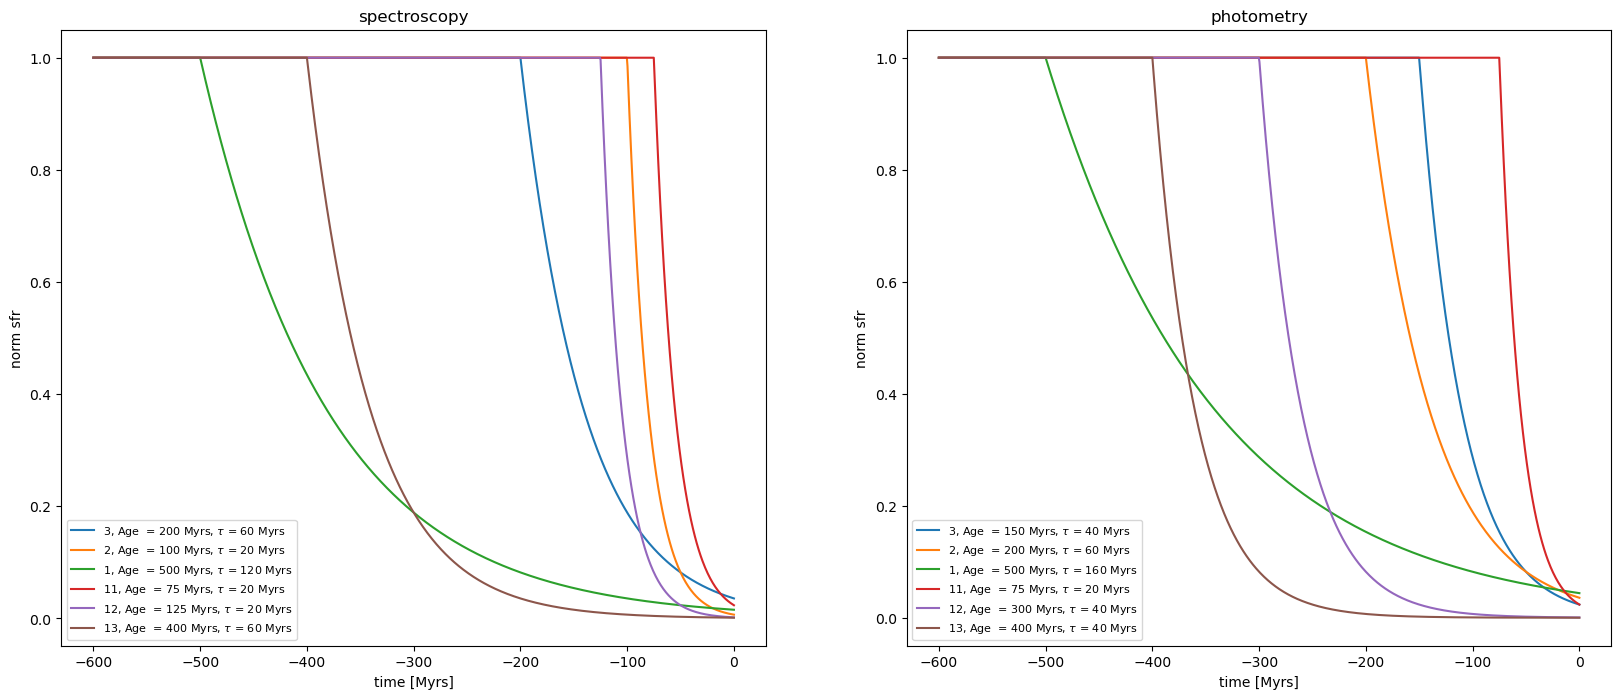

In [155]:


fig, ax = plt.subplots(1,2,figsize=(20,8))

t = np.linspace(0,-600,1000)

for i in range(len(spec_Qtau)):
    sfr_norm = np.where(t<-spec_Qage[i], 1, np.exp(-(t+spec_Qage[i])/spec_Qtau[i]))
    ax[0].plot(t,sfr_norm,label=f"{regions[i]}, Age  = {spec_Qage[i]} Myrs, $\\tau$ = {spec_Qtau[i]} Myrs")

    sfr_norm = np.where(t<-phot_Qage[i], 1, np.exp(-(t+phot_Qage[i])/phot_Qtau[i]))
    ax[1].plot(t,sfr_norm,label=f"{regions[i]}, Age  = {phot_Qage[i]} Myrs, $\\tau$ = {phot_Qtau[i]} Myrs")
    
for i in [0,1]:
    ax[i].legend(loc='lower left',fontsize=8)
    ax[i].set_xlabel("time [Myrs]")
    ax[i].set_ylabel("norm sfr")

ax[0].set_title("spectroscopy")
ax[1].set_title("photometry")

plt.show()